In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os


In [7]:
def calculate_LJ(r_ij):
    r6_term = math.pow(1/r_ij, 6)
    r12_term = math.pow(r6_term, 2)
    pairwise_energy = 4 * (r12_term - r6_term)
    return pairwise_energy

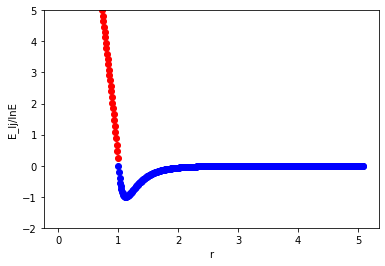

In [8]:
for i in range(1, 510):
    r = i * 0.01
    E = calculate_LJ(r)
    if E> 0:
        plt.scatter(r, math.log(E+1), c='red')
    else:
        plt.scatter(r, E, c='blue')
plt.xlabel('r')
plt.ylabel('E_lj/InE')
plt.ylim([-2, 5])
plt.show()

In [9]:
def calculate_distance(coord1, coord2):
    distance = 0
    for i in range(3):
        dim_dist = (coord1[i] - coord2[i]) ** 2
        distance += dim_dist
    
    distance = math.sqrt(distance)
    return distance


In [10]:
def calculate_total_energy(coordinates):
    total_energy = 0
    num_atoms = len(coordinates)
    for i in range(num_atoms):

        for j in range(i+1, num_atoms):
            dist_ij = calculate_distance(coordinates[i], coordinates[j])
            total_energy += calculate_LJ(dist_ij)
    
    return total_energy


In [11]:

def read_xyz(filepath):
    with open(filepath) as f:
        box_length = float(f.readline().split()[0])
        num_atoms = float(f.readline())
        coordinates = f.readlines()
    atomic_coordinates = []
    
    for atom in coordinates:
        split_atoms = atom.split()
        float_coords = []
        for coord in split_atoms[1:]:
            float_coords.append(float(coord))
            
        atomic_coordinates.append(float_coords)
       
    
    return atomic_coordinates, box_length, num_atoms


In [12]:
config1_file = 'C:\\Users\\91095\\Downloads\\xyz_file\\lj_sample_config_periodic1(1).txt'
sample_coords, box_length, number = read_xyz(config1_file)


In [13]:
def calculate_total_pair_energy(coordinates, cutoff):
    total_energy = 0
    num_atoms = len(coordinates)

    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            dist_ij = calculate_distance(coordinates[i], coordinates[j])
            if dist_ij < cutoff:
                LJ_ij = calculate_LJ(dist_ij)
                total_energy += LJ_ij
    return total_energy


In [14]:
def tail_correction(number, box_length, cutoff):
    r3_term = (1/cutoff)**3
    r9_term = (1/3)*(r3_term**3)
    constant = 8*np.pi*(number**2)/3/(box_length**3)
    U_tail = constant *(r9_term - r3_term)
    
    return U_tail


In [15]:
k = calculate_total_pair_energy(sample_coords, 3)
print(k)

-3487.454232861954


In [16]:
k1 = calculate_total_pair_energy(sample_coords, 2)
print(k1)

-3146.7337055373823


In [17]:
k2 = calculate_total_pair_energy(sample_coords, 1)
print(k2)

90.0638625094396


In [18]:
k3 = calculate_total_pair_energy(sample_coords, 0.9)
print(k3)

0
